In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import joblib
import numpy as np

In [2]:
data = pd.read_csv("../Final_codes/DATASET.csv")

In [3]:
model = joblib.load("../Final_codes/battery_random_forest_model1.joblib")

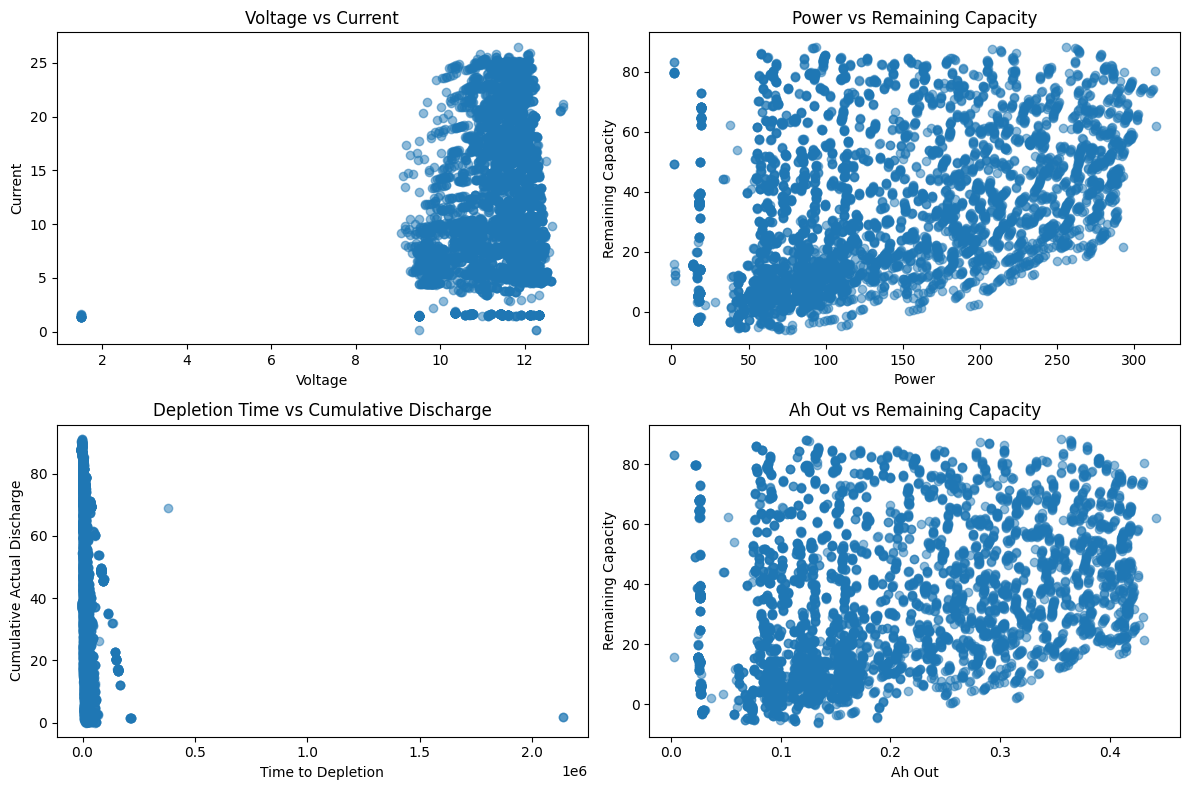

In [4]:
plt.figure(figsize=(12, 8))

# Plot Voltage vs Current
plt.subplot(2, 2, 1)
plt.scatter(data['Voltage'], data['Current'], alpha=0.5)
plt.xlabel('Voltage')
plt.ylabel('Current')
plt.title('Voltage vs Current')

# Plot Power vs Remaining Capacity
plt.subplot(2, 2, 2)
plt.scatter(data['Power'], data['Remaining Capacity'], alpha=0.5)
plt.xlabel('Power')
plt.ylabel('Remaining Capacity')
plt.title('Power vs Remaining Capacity')

# Plot Time to Depletion vs Cumulative Actual Disch Ah
plt.subplot(2, 2, 3)
plt.scatter(data['Time to Depletion'], data['Cumulative Actual Disch Ah'], alpha=0.5)
plt.xlabel('Time to Depletion')
plt.ylabel('Cumulative Actual Discharge')
plt.title('Depletion Time vs Cumulative Discharge')

# Plot Ah Out vs Remaining Capacity
plt.subplot(2, 2, 4)
plt.scatter(data['Ah Out'], data['Remaining Capacity'], alpha=0.5)
plt.xlabel('Ah Out')
plt.ylabel('Remaining Capacity')
plt.title('Ah Out vs Remaining Capacity')

plt.tight_layout()
plt.show()


In [5]:
data['prediction'] = None
pred = []

In [6]:
data.shape

(5437, 11)

In [7]:
for _, i in data.iterrows():
    x = pd.DataFrame(i).T
x


,Current,Voltage,Ah Out,Cumulative Actual Disch Ah,Power,Remaining Capacity,Time to Depletion,type,capacity,charged,prediction
5436,6.04,9.83,0.100667,76.240333,59.3732,3.759667,2240.860927,tn1,85.0,80.0,None


In [8]:
import threading

In [9]:
def predictor(pred,model,data):
    for index,i in data.iterrows():
        x = pd.DataFrame(i).T
        pred[index] = model.predict(x)

In [10]:
pred = {}

t1 = threading.Thread(target=predictor, args=(pred, model, data.iloc[:1000, :]))
t2 = threading.Thread(target=predictor, args=(pred, model, data.iloc[1000:2000, :]))
t3 = threading.Thread(target=predictor, args=(pred, model, data.iloc[2000:3000, :]))
t4 = threading.Thread(target=predictor, args=(pred, model, data.iloc[3000:4000, :]))
t5 = threading.Thread(target=predictor, args=(pred, model, data.iloc[4000:5000, :]))
t6 = threading.Thread(target=predictor, args=(pred, model, data.iloc[5000:5437, :]))

t1.start()
t2.start()
t3.start()
t4.start()
t5.start()
t6.start()

t1.join()
t2.join()
t3.join()
t4.join()
t5.join()
t6.join()


In [11]:
pred

{3000: array([9297.65794002]),
 1000: array([6844.19288264]),
 0: array([52487.35731419]),
 2000: array([17318.21571554]),
 5000: array([6640.67431574]),
 4000: array([10945.78854967]),
 1001: array([6754.96718523]),
 3001: array([10297.5981907]),
 1: array([28194.30398865]),
 5001: array([5770.04773333]),
 4001: array([10896.2766368]),
 2001: array([43557.94881325]),
 1002: array([6686.66410236]),
 2: array([28024.92132622]),
 3002: array([10261.83871187]),
 5002: array([6943.47804479]),
 2002: array([43467.68842215]),
 3: array([28033.51799506]),
 1003: array([6553.01065536]),
 5003: array([6921.06820554]),
 3003: array([10210.21125652]),
 2003: array([43450.48842215]),
 4002: array([10830.95677227]),
 4: array([28064.55257681]),
 1004: array([6512.490809]),
 5004: array([6911.28972464]),
 2004: array([43178.35485592]),
 3004: array([10143.1131217]),
 4003: array([10824.28953729]),
 5: array([25185.69918014]),
 1005: array([6495.72149312]),
 5005: array([7668.59121694]),
 2005: array

In [12]:
data['prediction'] = pred

In [13]:
data

,Current,Voltage,Ah Out,Cumulative Actual Disch Ah,Power,Remaining Capacity,Time to Depletion,type,capacity,charged,prediction
0,3.44,12.35,0.057333,0.057333,42.4840,53.942667,56451.627907,tn1,85.0,54.0,[52487.357314193825]
1,6.88,12.22,0.114667,0.172000,84.0736,53.828000,28165.813953,tn1,85.0,54.0,[28194.303988650187]
2,6.88,12.16,0.114667,0.286667,83.6608,53.713333,28105.813953,tn1,85.0,54.0,[28024.92132622429]
3,6.88,12.17,0.114667,0.401333,83.7296,53.598667,28045.813953,tn1,85.0,54.0,[28033.51799506479]
4,6.87,12.18,0.114500,0.515833,83.6766,53.484167,28026.637555,tn1,85.0,54.0,[28064.552576814393]
...,...,...,...,...,...,...,...,...,...,...,...
5432,6.69,9.74,0.111500,75.816500,65.1606,4.183500,2251.210762,tn1,85.0,80.0,[2293.6315002880624]
5433,6.69,9.75,0.111500,75.928000,65.2275,4.072000,2191.210762,tn1,85.0,80.0,[2190.232629468911]
5434,6.69,9.75,0.111500,76.039500,65.2275,3.960500,2131.210762,tn1,85.0,80.0,[2152.5014527421617]
5435,6.01,9.83,0.100167,76.139667,59.0783,3.860333,2312.346090,tn1,85.0,80.0,[2221.5857117651603]


In [14]:
with open("../Final_codes/DATASET2.csv", "w") as f:
    f.write(
        data.to_csv(index=False)
    )